Today, we are going to get a little deeper into what is going on with PCA.  In fact, over the course of this notebook, we are going to implement it. First, let's do some feature selection warmups

## Feature selection

We will start off by loading a simple data set and then performing some simple approaches to selecting features

In [1]:
from sklearn.datasets import load_linnerud
linnerud_data = load_linnerud()
        
D = linnerud_data['data']

First let's check out some info about the data

In [2]:
linnerud_data['feature_names']

['Chins', 'Situps', 'Jumps']

Super!  This data set has something to do with exercising (and is generally used for leaning about linear regression, but will be fine for our purposes).  Next, let's grab the data and look at some info about it.

In [3]:
D = linnerud_data['data']
D.shape

(20, 3)

In [4]:
D

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

We saw that one way we can quantify the useful featuers of our data is by variance.  So, let's look at the estimated covariance matrix.

In [5]:
import numpy as np
np.cov(D.T, ddof=1)

array([[  27.94473684,  230.10789474,  134.38421053],
       [ 230.10789474, 3914.57631579, 2146.98421053],
       [ 134.38421053, 2146.98421053, 2629.37894737]])

Great!  so let's keep only the meaningful attributes.  I wasn't sure how to tell what a good cutoff would be so I asked Prof Barktreuse.  She exercises a ton (and infact go a little nuts if she doesn't get at least 30 minutes of exercise per day).  She was suspect of my idea, but said to try 100 as the variance theshold.

In [6]:
from sklearn.feature_selection import VarianceThreshold

threshold = 100
feature_selector = VarianceThreshold(threshold=threshold)
feature_selector.fit_transform(D)

array([[162.,  60.],
       [110.,  60.],
       [101., 101.],
       [105.,  37.],
       [155.,  58.],
       [101.,  42.],
       [101.,  38.],
       [125.,  40.],
       [200.,  40.],
       [251., 250.],
       [120.,  38.],
       [210., 115.],
       [215., 105.],
       [ 50.,  50.],
       [ 70.,  31.],
       [210., 120.],
       [ 60.,  25.],
       [230.,  80.],
       [225.,  73.],
       [110.,  43.]])

So it looks like we got the features in the situps and jumps columns.

I asked Prof Barktreuse why she was suspect, and she said that I have not taken scale into account. ... Of course... Prof Barktrues saved the day again. Let's min-max scale our data and try again with a threashold of .6.

In [7]:
from sklearn.preprocessing import MinMaxScaler
D_normalized = MinMaxScaler().fit_transform(D)
D_normalized

array([[0.25      , 0.55721393, 0.15555556],
       [0.0625    , 0.29850746, 0.15555556],
       [0.6875    , 0.25373134, 0.33777778],
       [0.6875    , 0.27363184, 0.05333333],
       [0.75      , 0.52238806, 0.14666667],
       [0.1875    , 0.25373134, 0.07555556],
       [0.4375    , 0.25373134, 0.05777778],
       [0.3125    , 0.37313433, 0.06666667],
       [0.875     , 0.74626866, 0.06666667],
       [1.        , 1.        , 1.        ],
       [1.        , 0.34825871, 0.05777778],
       [0.75      , 0.7960199 , 0.4       ],
       [0.8125    , 0.82089552, 0.35555556],
       [0.        , 0.        , 0.11111111],
       [0.3125    , 0.09950249, 0.02666667],
       [0.6875    , 0.7960199 , 0.42222222],
       [0.1875    , 0.04975124, 0.        ],
       [0.625     , 0.89552239, 0.24444444],
       [0.875     , 0.87064677, 0.21333333],
       [0.0625    , 0.29850746, 0.08      ]])

In [8]:
import numpy as np
np.cov(D_normalized.T, ddof=1)

array([[0.10915913, 0.07155096, 0.03732895],
       [0.07155096, 0.09689306, 0.04747339],
       [0.03732895, 0.04747339, 0.05193835]])

In [9]:
threshold = .06
feature_selector = VarianceThreshold(threshold=threshold)
feature_selector.fit_transform(D_normalized)

array([[0.25      , 0.55721393],
       [0.0625    , 0.29850746],
       [0.6875    , 0.25373134],
       [0.6875    , 0.27363184],
       [0.75      , 0.52238806],
       [0.1875    , 0.25373134],
       [0.4375    , 0.25373134],
       [0.3125    , 0.37313433],
       [0.875     , 0.74626866],
       [1.        , 1.        ],
       [1.        , 0.34825871],
       [0.75      , 0.7960199 ],
       [0.8125    , 0.82089552],
       [0.        , 0.        ],
       [0.3125    , 0.09950249],
       [0.6875    , 0.7960199 ],
       [0.1875    , 0.04975124],
       [0.625     , 0.89552239],
       [0.875     , 0.87064677],
       [0.0625    , 0.29850746]])

And this time, it looks like we got the chins and situps features.  So, this demonstrates when performing features selection using variance, we have to be careful as the scale of the fields of the data can matter.

## PCA
Recall from last time, the PCA algorithm:

![pca-algo.png](09-imgs/pca-algo.png)

We will walk though some background and then implement the algo.  We will start by loading in the iris data set

In [10]:
from sklearn.datasets import load_iris
D_iris = load_iris()['data']

And lets get some info about the data and take a look at a projection of the data

In [11]:
D_iris.shape

(150, 4)

Let's just grab 2 dimensions of the data

In [12]:
D = D_iris[:, 1:3]

Text(0.5, 1.0, 'Scatter plot of data matrix D_iris')

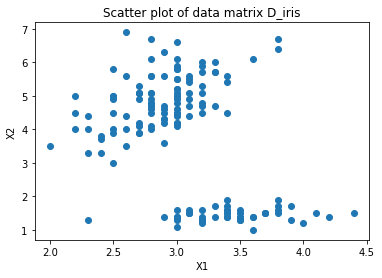

In [13]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D_iris')

### Mean centering

Recall that the first thing we needed to do to our data was mean center it.  We have done that a few times, but, for completeness, let's mean center our data.

In [14]:
multi_d_mean = np.mean(D, axis=0)
multi_d_mean

array([3.05733333, 3.758     ])

In [15]:
centered_data = D - multi_d_mean
centered_data

array([[ 0.44266667, -2.358     ],
       [-0.05733333, -2.358     ],
       [ 0.14266667, -2.458     ],
       [ 0.04266667, -2.258     ],
       [ 0.54266667, -2.358     ],
       [ 0.84266667, -2.058     ],
       [ 0.34266667, -2.358     ],
       [ 0.34266667, -2.258     ],
       [-0.15733333, -2.358     ],
       [ 0.04266667, -2.258     ],
       [ 0.64266667, -2.258     ],
       [ 0.34266667, -2.158     ],
       [-0.05733333, -2.358     ],
       [-0.05733333, -2.658     ],
       [ 0.94266667, -2.558     ],
       [ 1.34266667, -2.258     ],
       [ 0.84266667, -2.458     ],
       [ 0.44266667, -2.358     ],
       [ 0.74266667, -2.058     ],
       [ 0.74266667, -2.258     ],
       [ 0.34266667, -2.058     ],
       [ 0.64266667, -2.258     ],
       [ 0.54266667, -2.758     ],
       [ 0.24266667, -2.058     ],
       [ 0.34266667, -1.858     ],
       [-0.05733333, -2.158     ],
       [ 0.34266667, -2.158     ],
       [ 0.44266667, -2.258     ],
       [ 0.34266667,

Next, let's plot the original data and the mean centered data.

Text(0.5, 1.0, 'Scatter plot of centered and original data')

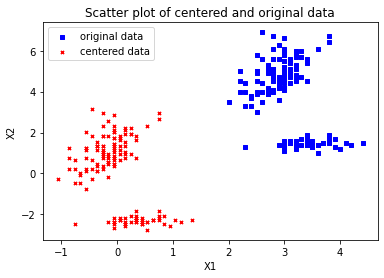

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='r', marker='x', label='centered data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and original data')

**Question**: *What do you think the mean of the centered data is?*

In [17]:
np.mean(centered_data, axis = 0)

array([-7.60872846e-16, -2.55203266e-15])

Yep, that is numerically zero!  

### Linearly Transorming Data

Next, let's recall linear transforamtions as a rotaton and a scaling.  Let's pick an arbitrary linear transormation and move some points around.

In [18]:
A = np.array([[2,1],[1,-1]])
A

array([[ 2,  1],
       [ 1, -1]])

In [19]:
D[0,:]

array([3.5, 1.4])

In [20]:
A.dot(D[0,:])

array([8.4, 2.1])

In [21]:
D[1,:]

array([3. , 1.4])

In [22]:
A.dot(D[1,:])

array([7.4, 1.6])

Great!  So let's transform all the data in one go!

In [23]:
linearly_transformed_data = A.dot(D.T)
linearly_transformed_data.T

array([[ 8.4,  2.1],
       [ 7.4,  1.6],
       [ 7.7,  1.9],
       [ 7.7,  1.6],
       [ 8.6,  2.2],
       [ 9.5,  2.2],
       [ 8.2,  2. ],
       [ 8.3,  1.9],
       [ 7.2,  1.5],
       [ 7.7,  1.6],
       [ 8.9,  2.2],
       [ 8.4,  1.8],
       [ 7.4,  1.6],
       [ 7.1,  1.9],
       [ 9.2,  2.8],
       [10.3,  2.9],
       [ 9.1,  2.6],
       [ 8.4,  2.1],
       [ 9.3,  2.1],
       [ 9.1,  2.3],
       [ 8.5,  1.7],
       [ 8.9,  2.2],
       [ 8.2,  2.6],
       [ 8.3,  1.6],
       [ 8.7,  1.5],
       [ 7.6,  1.4],
       [ 8.4,  1.8],
       [ 8.5,  2. ],
       [ 8.2,  2. ],
       [ 8. ,  1.6],
       [ 7.8,  1.5],
       [ 8.3,  1.9],
       [ 9.7,  2.6],
       [ 9.8,  2.8],
       [ 7.7,  1.6],
       [ 7.6,  2. ],
       [ 8.3,  2.2],
       [ 8.6,  2.2],
       [ 7.3,  1.7],
       [ 8.3,  1.9],
       [ 8.3,  2.2],
       [ 5.9,  1. ],
       [ 7.7,  1.9],
       [ 8.6,  1.9],
       [ 9.5,  1.9],
       [ 7.4,  1.6],
       [ 9.2,  2.2],
       [ 7.8,

In [24]:
D

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

But let's look at how the data changed

Text(0.5, 1.0, 'Scatter plot of original data and linearly transformed data')

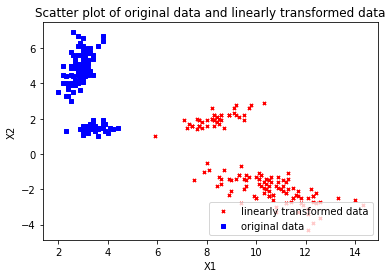

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(linearly_transformed_data[0,:], linearly_transformed_data[1,:], s=10, c='r', marker='x', label='linearly transformed data')
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower right')
plt.title('Scatter plot of original data and linearly transformed data')

Great, now, let's compute the cov matrix.  The easiest way to do that, is just do get the cov of the data.

In [26]:
Sigma = np.cov(D.T, ddof=1)
Sigma

array([[ 0.18997942, -0.32965638],
       [-0.32965638,  3.11627785]])

Or, we an compute it the way we saw in the notes:

In [27]:
n = D.shape[0]
1/(n-1)*np.dot(centered_data.T, centered_data)

array([[ 0.18997942, -0.32965638],
       [-0.32965638,  3.11627785]])

Notice that they are the same!  ... which does make sense.  Steps 1-3 were to compute the covariance matrix, which with numpy we can compute directly with the `cov` function.

### Eigenvalues

Next up is one of the major steps, we will get the eigenvalues and engenvectors of the covariance matrix

In [28]:
import numpy.linalg as LA
evalues, evectors = LA.eig(Sigma)

In [29]:
evalues

array([0.15330233, 3.15295494])

In [30]:
evectors

array([[-0.99386764,  0.11057628],
       [-0.11057628, -0.99386764]])

Note that in class, and the algorithm, the eigenvalues (and corresponding vectors) were assumed to be sorted in decending order by eigenvalue.  Numpy does not do that, so let's sort them! 

In [31]:
idx = evalues.argsort()[::-1]
evalues = evalues[idx]
evectors = evectors[:, idx]

and now they are sorted in decending order by eigenvalue

In [32]:
print(evalues)
print(evectors)

[3.15295494 0.15330233]
[[ 0.11057628 -0.99386764]
 [-0.99386764 -0.11057628]]


Recall that the sum of the eigenvalues is the total variance of the dataset.  That is 

In [33]:
total_var = sum(np.diag(Sigma))
total_var

3.3062572706935125

In [34]:
sum(evalues)

3.3062572706935125

And, we can find the proportion of the total variance attributred to each eigenvector.  For example, in just the direction of the largest eigenvalues, we capture over 95% of the total variance:

In [35]:
evalues[0]/total_var

0.9536326686835204

Let's project our data on to the largest eigenvector.

In [36]:
coords_along_eig0 = evectors[:,0].T.dot(centered_data.T)
coords_along_eig0

array([ 2.39248833,  2.33720019,  2.45870221,  2.24887105,  2.40354596,
        2.13855855,  2.3814307 ,  2.28204394,  2.32614256,  2.24887105,
        2.31521682,  2.18265717,  2.33720019,  2.63536048,  2.64655   ,
        2.39262021,  2.5361056 ,  2.39248833,  2.12750092,  2.32627445,
        2.08327041,  2.31521682,  2.80109301,  2.07221278,  1.88449688,
        2.13842666,  2.18265717,  2.29310156,  2.3814307 ,  2.16054192,
        2.14948429,  2.28204394,  2.35944733,  2.46989172,  2.24887105,
        2.55808897,  2.49187509,  2.40354596,  2.43658695,  2.28204394,
        2.49187509,  2.35918356,  2.45870221,  2.1937148 ,  1.92872739,
        2.33720019,  2.22688768,  2.35931545,  2.31521682,  2.37037307,
       -0.92044777, -0.72167424, -1.13027892, -0.32425907, -0.86529152,
       -0.76590475, -0.90939014,  0.38250591, -0.85423389, -0.18064179,
        0.13950187, -0.4456292 , -0.3353167 , -0.95362065,  0.13963375,
       -0.6333451 , -0.7437895 , -0.37941532, -0.83225052, -0.20

Observe that now, we now have a 1 dimensional representation of our data that captures about 95% of the total variance of the original data set.

In [37]:
coords_along_eig0.shape

(150,)

It can be helpful to visuzlize the data projected on to the eigenvector.  Below, we plot the centered data in blue and the projected data in red

Text(0.5, 1.0, 'Scatter plot of centered and PCA-transformed data')

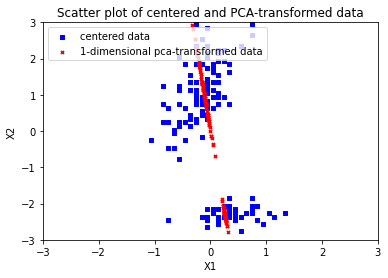

In [38]:
coords_along_eig0 = evectors[:,0].T.dot(centered_data.T)

projected_along_eig0 = np.zeros((n,2))
for i in range(len(coords_along_eig0)):
    projected_along_eig0[i,:] = coords_along_eig0[i]*evectors[:,0]

pjdev0 = projected_along_eig0
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')

And we can also look at what would happen if we projected on to the other eigenvector

Text(0.5, 1.0, 'Scatter plot of centered and PCA-transformed data')

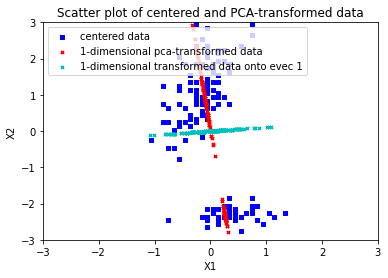

In [39]:
coords_along_eig1 = evectors[:,1].T.dot(centered_data.T)

projected_along_eig1 = np.zeros((n,2))
for i in range(len(coords_along_eig1)):
    projected_along_eig1[i,:] = coords_along_eig1[i]*evectors[:,1]

pjdev1 = projected_along_eig1
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='c', marker='x', label='1-dimensional transformed data onto evec 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')

Note that we don't just have to project on to one of the vectors, we can project on to multiple axes.

In [40]:
coords_in_evec_axes = evectors.T.dot(centered_data.T)
coords_in_evec_axes.shape

(2, 150)

Text(0.5, 1.0, 'scatter plot of transformed data with eigenvectors as axes')

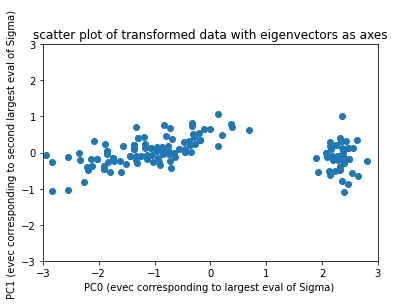

In [41]:
plt.scatter(coords_in_evec_axes[0,:], coords_in_evec_axes[1,:])
plt.xlabel('PC0 (evec corresponding to largest eval of Sigma) ')
plt.ylabel('PC1 (evec corresponding to second largest eval of Sigma) ')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot of transformed data with eigenvectors as axes')

### PCA in the wild

PCA is one of the most popular dimensionality reduction algorithms.  So, it is natrual to assume that it would be in all the standard libraries.  So, let's look at how to use PCA in scikit-learn!

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D)

After we run PCA, we can get some info about what the decomposition did:

In [43]:
pca.explained_variance_ratio_

array([0.95363267, 0.04636733])

**Question**: *Any idea about what those mean?*

Yep, those are the propotion of the variance in the direction of each principal component.

In [44]:
print(evalues[0] / sum(evalues))
print(evalues[1] / sum(evalues))

0.9536326686835204
0.046367331316479625


We can also get the eigenvectors:

In [45]:
pca.components_ 

array([[-0.11057628,  0.99386764],
       [ 0.99386764,  0.11057628]])

**WARNING**: note that for `pca.components_` the eigenvectors are listed row wise in decreasing order of eigenvalue magnitudes.  So we have:
- 0th eigenvector is [-0.11057628,  0.99386764] 
- 1st eigenvector is [ 0.99386764,  0.11057628]

If we compare with our eigenvalues, we get:

In [46]:
evectors

array([[ 0.11057628, -0.99386764],
       [-0.99386764, -0.11057628]])

Which are listed column wise.  Recall that they are also in decreasing order of eignvalue magnitudes, however, we processed the results from the eigenvalue decomposition so that it was the case.  So we have:

- 0th eigenvector is [0.11057628, -0.99386764]
- 1st eigenvector is [-0.99386764, -0.11057628]

Notice the difference? ... the vectors are facing opposite directions.  This is okay though.  Notice that we select the 0th eigenvector because it maximizes variance.  And therefore, the opposite would also maximize variance.  Then we get the next eigenvector, which maximizes variance subject to being ortogonal to the first direction.  As before the opposite direction has the same property!  Note that if that all sounded like a bunch of gobbly-gook, that is okay.  But, if you are interested in exploring these properties futher, we do that in the Grad Data Mining course... which will be offered in the Fall!

We can, however, explore this idea a little further with pictures.

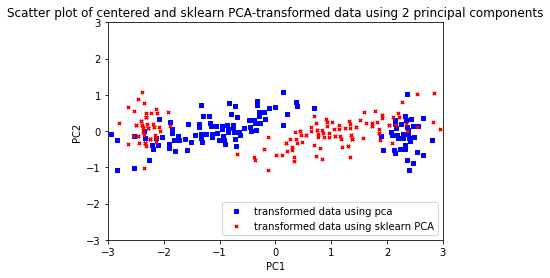

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(coords_in_evec_axes[0,:], coords_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')

So, we can see that the blue points and the red points are reflectison of eachother.  That is becuase the directions we projected on to are the opposite of the directions that sklearn projected on to.  To use the same directions, just multiply each coordinate by -1

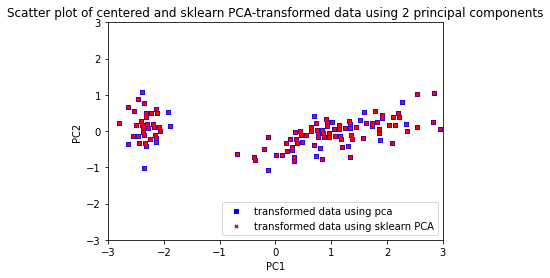

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*coords_in_evec_axes[0,:], -1*coords_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')

One other thing that we discussed a few times is that once we have our transformed points, we have a representation in which the variance in each directdion is independed.  We can confim that now:

In [49]:
np.cov(coords_in_evec_axes)

array([[3.15295494e+00, 4.76874319e-17],
       [4.76874319e-17, 1.53302326e-01]])

(and we can observe that the off diagonal values are numerically 0!)

### Using a real data set

Now, let's look at using PCA to visualize a dataset with more than 3 dimensions.  Recall that we started off looking at specific features of the iris data set in 2D. That data set has 4 features, which made it hard to plot.  But we could instead use PCA to visualize the dataset in 2D!

In [50]:
D_iris = load_iris()['data']
pca = PCA(n_components=2)
pca_transformed_D_iris = pca.fit_transform(D_iris)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [51]:
D_iris.shape

(150, 4)

In [52]:
pca_transformed_D_iris.shape

(150, 2)

Text(0.5, 1.0, 'PCA-transformed iris data using 2 principal components')

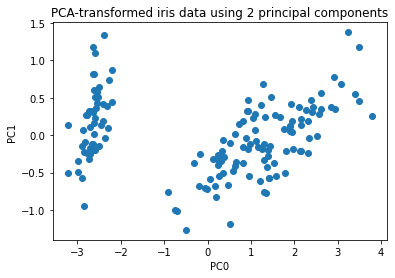

In [53]:
plt.scatter(pca_transformed_D_iris[:, 0], pca_transformed_D_iris[:, 1])
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA-transformed iris data using 2 principal components')

Cool!!  Aside from visualizing, we can also run all the cool algos that we have studied so far (and will study for the rest of the semester) on the lower dimensional dataset!!  We still captured most of the variance of the data but with the reduced dimension, we have some algorithmic speedups!